In [2]:
import numpy as np    
import cv2
import matplotlib.pyplot as pl   
import os 

#Defining our imshow function

def imshow(title = "", image = None, size =5):
    w= image.shape[0]
    h=image.shape[1]
    aspect_ratio = w/h     
    pl.figure(figsize = (size*aspect_ratio,size))
    pl.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    pl.title(title)
    pl.show()

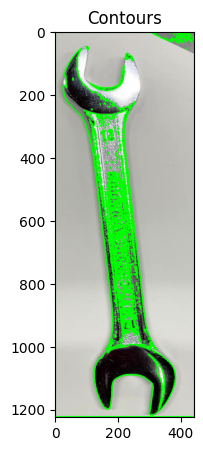

In [3]:
import cv2
import numpy as np

img = cv2.imread('frame_0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
imshow('Contours', img)



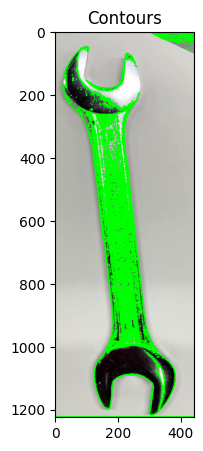

In [4]:
img = cv2.imread('frame_0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
imshow('Contours', img)


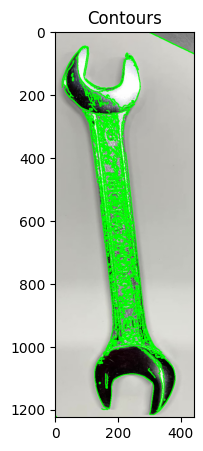

In [5]:
img = cv2.imread('frame_0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 2)
edges = cv2.Canny(blurred, 30, 150)
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    cv2.drawContours(img, contours, i, (0, 255, 0), 2)

imshow('Contours', img)

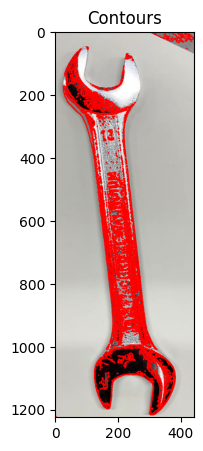

In [6]:
img = cv2.imread('frame_0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
_, mask = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
masked = cv2.bitwise_and(gray, gray, mask=mask)
edges = cv2.Canny(masked, 0, 150)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
imshow('Contours', img)

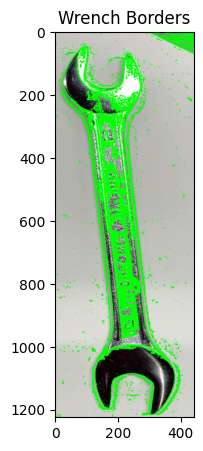

In [7]:
import cv2

# Load the image
img = cv2.imread('frame_0.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# Display the image
imshow('Wrench Borders', img)



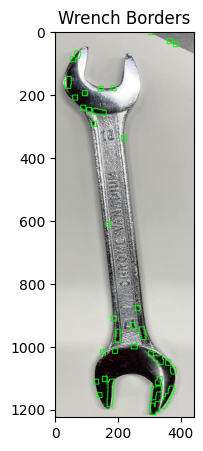

In [8]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('frame_0.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to create a binary image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Remove small noise using morphology operations
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Dilate the image to connect broken parts of the wrench
dilated = cv2.dilate(opening, kernel, iterations=3)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# Display the image
imshow('Wrench Borders', img)



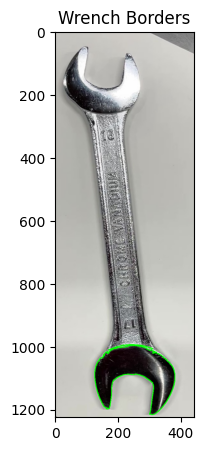

Distance between top and bottom of wrench border:  234.33522995913356


In [9]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('frame_0.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Draw the contour on the original image
cv2.drawContours(img, [largest_contour], -1, (0, 255, 0), 2)

# Find the top and bottom points of the contour
top_point = tuple(largest_contour[largest_contour[:,:,1].argmin()][0])
bottom_point = tuple(largest_contour[largest_contour[:,:,1].argmax()][0])

# Calculate the distance between the top and bottom points
distance = np.sqrt((bottom_point[0]-top_point[0])**2 + (bottom_point[1]-top_point[1])**2)

# Display the image and distance measurement
imshow('Wrench Borders', img)
print('Distance between top and bottom of wrench border: ', distance)



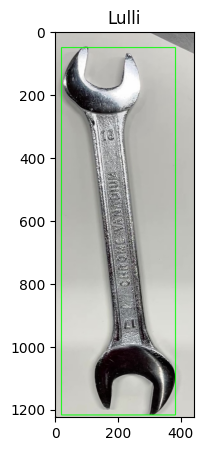

In [10]:
import cv2


img = cv2.imread("frame_0.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = max(contours, key=cv2.contourArea) #get biggest contour

x, y, w, h = cv2.boundingRect(c)  #find the BB

cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #box on org img

distance = h #get dist btw U and L edges of BB
imshow("Lulli", img)



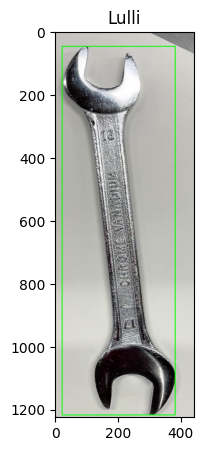

Distance between upper and lower edges of bounding box: 1172


In [11]:
import cv2

# Read the image
img = cv2.imread("frame_0.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = max(contours, key=cv2.contourArea) #get biggest contour

x, y, w, h = cv2.boundingRect(c)  #find the BB

cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  #box on org img

upper_edge_y = y #calculate the dist btw the upper and lower edges of the BB
lower_edge_y = y + h
distance = abs(lower_edge_y - upper_edge_y)

imshow("Lulli", img)

print("Distance between upper and lower edges of bounding box:", distance)


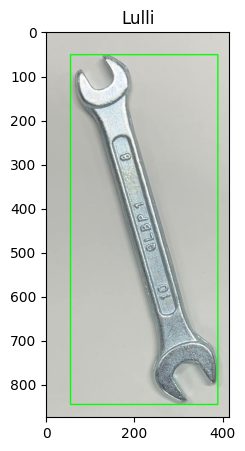

Distance between upper and lower edges of bounding box: 794


In [12]:
import cv2

# Read the image
img = cv2.imread("frame_00003.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,199,5)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = max(contours, key=cv2.contourArea) #get biggest contour

x, y, w, h = cv2.boundingRect(c)  #find the BB

cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  #box on org img

upper_edge_y = y #calculate the dist btw the upper and lower edges of the BB
lower_edge_y = y + h
distance = abs(lower_edge_y - upper_edge_y)

imshow("Lulli", img)

print("Distance between upper and lower edges of bounding box:", distance)


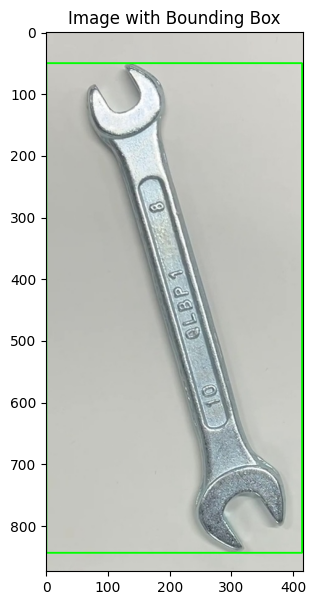

In [13]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('frame_00003.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to find the edges in the image
edges = cv2.Canny(gray, 50, 150)

# Find the contours of the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the y-coordinate of the topmost and bottommost edge
top_y = img.shape[0]
bottom_y = 0
for contour in contours:
    for point in contour:
        y = point[0][1]
        if y < top_y:
            top_y = y
        if y > bottom_y:
            bottom_y = y

# Draw the bounding box from the topmost edge to the bottommost edge
cv2.rectangle(img, (0, top_y), (img.shape[1]-2, bottom_y), (0, 255, 0), 2)

# Display the image with the bounding box
imshow('Image with Bounding Box', img,7)


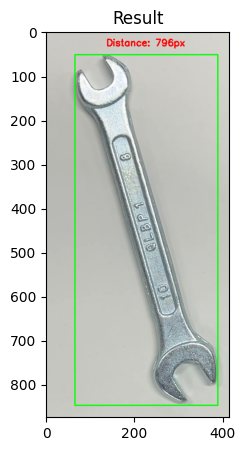

Distance between upper and lower edges of bounding box: 796


In [14]:
import cv2

# Read the image
img = cv2.imread("frame_00003.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour
c = max(contours, key=cv2.contourArea)

# Find the bounding box
x, y, w, h = cv2.boundingRect(c)

# Draw the bounding box on the original image
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Calculate the distance between the upper and lower edges of the bounding box
upper_edge_y = y
lower_edge_y = y + h
distance = abs(lower_edge_y - upper_edge_y)

text = f"Distance: {distance}px"
text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
text_x = x + int(w/2) - int(text_size[0]/2)
text_y = y - 20
cv2.putText(img, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display the result
imshow("Result", img)


# Print the distance between the upper and lower edges of the bounding box
print("Distance between upper and lower edges of bounding box:", distance)


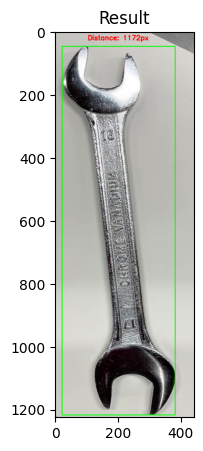

Distance between upper and lower edges of bounding box: 1172


In [15]:
import cv2

img = cv2.imread("frame_0.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(c)

cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)


upper_edge_y = y
lower_edge_y = y + h
distance = abs(lower_edge_y - upper_edge_y)

text = f"Distance: {distance}px"
text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
text_x = x + int(w/2) - int(text_size[0]/2)
text_y = y - 20
cv2.putText(img, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

imshow("Result", img)

print("Distance between upper and lower edges of bounding box:", distance)


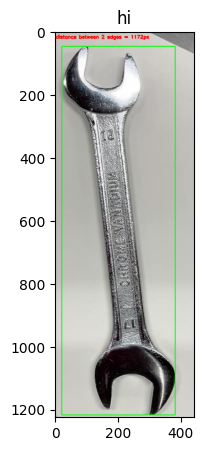

In [16]:
img = cv2.imread("frame_0.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 11, 2)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = max(contours, key=cv2.contourArea) #get biggest contour

x, y, w, h = cv2.boundingRect(c)  #find the BB

cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #box on org img

distance = h #get dist btw U and L edges of BB
cv2.putText(img,  "distance between 2 edges = " + str(h) + "px", (2, 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),2)
imshow("hi",img)

X Distance

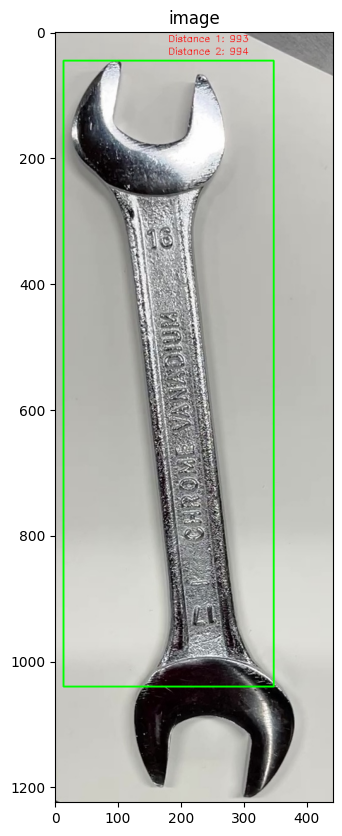

In [17]:
import cv2
import numpy as np

# Load image and convert to grayscale
img = cv2.imread('frame_0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 21, 1)

# Find contours and sort by area
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Find uppermost and lowermost points
uppermost = tuple(contours[0][contours[0][:,:,1].argmin()][0])
lowermost = tuple(contours[0][contours[0][:,:,1].argmax()][0])

# Find last second uppermost and last second lowermost points
sorted_contours = sorted(contours[0], key=lambda x:x[0][1])
last_second_uppermost = tuple(sorted_contours[1][0])
last_second_lowermost = tuple(sorted_contours[-2][0])

# Calculate distances
distance1 = abs(uppermost[1] - last_second_lowermost[1])
distance2 = abs(lowermost[1] - last_second_uppermost[1])

# Draw bounding box
x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Print distances on image
cv2.putText(img, f"Distance 1: {distance1}", (x + int(w/2), y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
cv2.putText(img, f"Distance 2: {distance2}", (x + int(w/2), y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Display image
imshow('image', img,10)



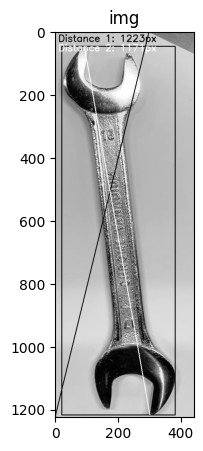

In [18]:
import cv2
import numpy as np

img = cv2.imread('frame_0.jpg', 0)

thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 11, 2)

#find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort them by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

#initialize
uppermost_point = None
lowermost_point = None
second_uppermost_point = None
second_lowermost_point = None

#go through contours 
for contour in contours:
    #find bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    #find the uppermost and lowermost pts of them
    contour_points = contour[:, 0, :]
    contour_uppermost_point = tuple(contour_points[contour_points[:, 1].argmin()])
    contour_lowermost_point = tuple(contour_points[contour_points[:, 1].argmax()])
    
    #check if the uppermost and lowermost points of the contour lie within the bounding rectangle
    if y <= contour_uppermost_point[1] <= y+h:
        #check if the uppermost point of the contour is higher than the current uppermost pt
        if uppermost_point is None or contour_uppermost_point[1] < uppermost_point[1]:
            #set the uppermost point as the new uppermost pt
            uppermost_point = contour_uppermost_point
    
    if y <= contour_lowermost_point[1] <= y+h:
        #check if the lowermost point of the contour is lower than the current lowermost pt
        if lowermost_point is None or contour_lowermost_point[1] > lowermost_point[1]:
            #set the lowermost point as the new lowermost pt
            lowermost_point = contour_lowermost_point
            
    if y <= contour_uppermost_point[1] <= y+h:
        if second_uppermost_point is None or contour_uppermost_point[1] < second_uppermost_point[1] < uppermost_point[1]:
            second_uppermost_point = contour_uppermost_point
            
    if y <= contour_lowermost_point[1] <= y+h:
        if second_lowermost_point is None or contour_lowermost_point[1] > second_lowermost_point[1] > lowermost_point[1]:
            second_lowermost_point = contour_lowermost_point

#calculate the distance btw the uppermost and lowermost pts
distance = abs(lowermost_point[1] - uppermost_point[1])
distance_2 = abs(second_lowermost_point[1] - second_uppermost_point[1])

#draw BB around the wrench
x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#draw a line btw the uppermost and lowermost pt
cv2.line(img, uppermost_point, lowermost_point, (0, 0, 255), 2)
cv2.line(img, second_uppermost_point, second_lowermost_point, (255, 0, 0), 2)

#printing distances 
text = f"Distance 1: {distance}px"
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

text_2 = f"Distance 2: {distance_2}px"
cv2.putText(img, text_2, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

imshow("img",img)


In [19]:
def thresh(image):

    img = cv2.imread(image)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0) #take out noise 

    ret, thresh = cv2.threshold(blur, 120, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C) #thresh to separate water from background
    imshow("thresh", thresh)

In [20]:
def SatImg(image):
    image = cv2.imread(image)

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    satimg = hsv_image[:, :, 1]

    imshow('saturated',satimg)

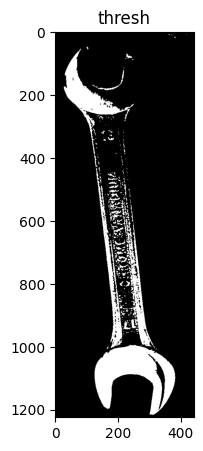

In [21]:
thresh('frame_0.jpg')

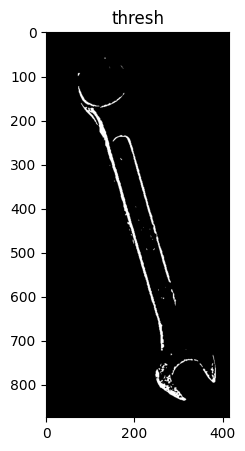

In [22]:
thresh('frame_00003.jpg')

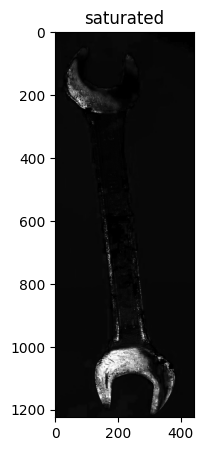

In [23]:
SatImg('frame_0.jpg')

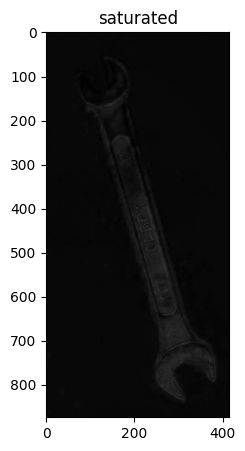

In [24]:
SatImg('frame_00003.jpg')

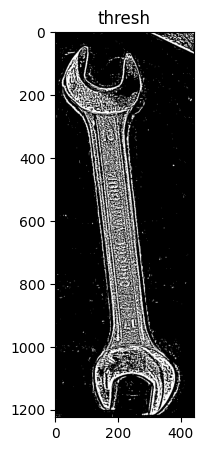

In [25]:
import cv2
import numpy as np

def thresh2(image):
    img = cv2.imread(image, 0)

    blockSizes = [3, 5, 7, 9, 11]
    Cs = [-3, -2, -1, 0, 1, 2, 3]

    best_score = -np.inf
    best_bs = None
    best_c = None

    #loop over different parameter values and evaluate their performance
    for bs in blockSizes:
        for c in Cs:
            thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, bs, c)
            score = np.mean(np.square(thresh - img))
            if score > best_score:
                best_score = score
                best_bs = bs
                best_c = c

    #apply the best parameter values to the image
    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, best_bs, best_c)

    imshow('thresh',thresh)
    
thresh2('frame_0.jpg')
